# Dataset del TITANIC - SANTIAGO TORRES, ANALISIS DE DATOS, TAREA 5- FINAL

# --selecciono el modelo de aprendizaje Supervisado Árboles de decisión para trabajar con el dataset del titanic.

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
#cargar las librerias necesarias
import pandas as pd #maneja y analisa estructura de datos.
import numpy as np # calculo numerico y el analisis de datos
import seaborn as sns # creacion graficos estadisticos
import matplotlib.pyplot as plt # crea graficos en 2 dimensiones

# librerias para implementar modelo de ciencia de datos
from sklearn import tree
from sklearn.model_selection import train_test_split # de sklearn me importa train_test
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
# Lectura del dataset y se cargan en la variable titanic
titanic = pd.read_csv('Titanic-Dataset.csv')
# se realiza la lectura de los datos para el analisis exploratorio
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape  # nos muestra la dimension del dataset

(891, 12)

In [5]:
titanic.describe() # me muestra las medidas estadisticas

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# transformamos algunas columnas
# Utilizamos la función map() para asignar 1 a 'male' y 0 a 'female'
titanic['Sex'] = titanic['Sex'].map({'male': 1, 'female': 0})
# Mostramos los primeros registros del DataFrame para verificar el cambio
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


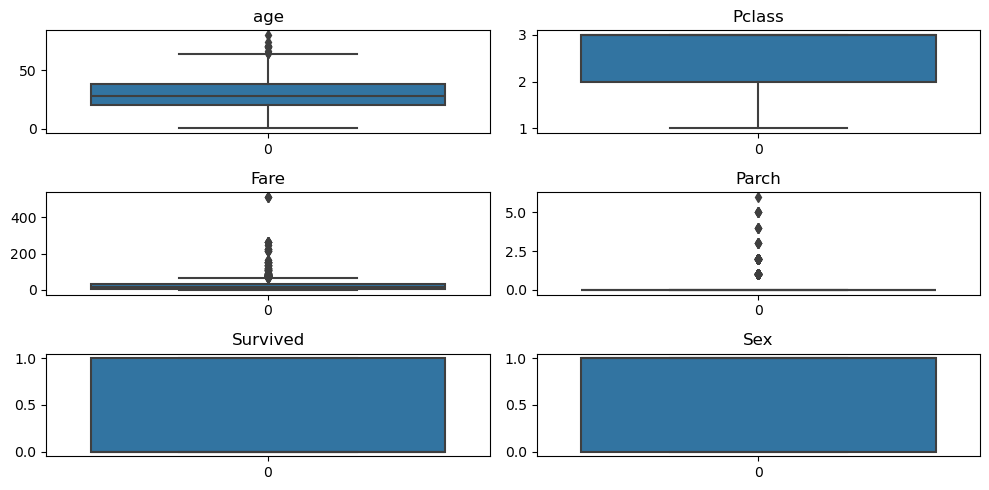

In [11]:
# Identificacion de valores faltantes y atipicos
#plt.figure(figsize=(6, 3))  #figura de 6*3
fig, axs = plt.subplots(3,2, figsize = (10,5))
#plt.title('Identificacion de datos faltantes y atipicos', fontsize=10 )
plt3 = sns.boxplot(titanic['Age'], ax = axs[0,0]).set_title("age")
plt1 = sns.boxplot(titanic['Pclass'], ax = axs[0,1]).set_title("Pclass")
plt2 = sns.boxplot(titanic['Fare'], ax = axs[1,0]).set_title("Fare")
plt4 = sns.boxplot(titanic['Parch'], ax = axs[1,1]).set_title("Parch")
plt5 = sns.boxplot(titanic['Survived'], ax = axs[2,0]).set_title("Survived")
plt6 = sns.boxplot(titanic['Sex'], ax = axs[2,1]).set_title("Sex")

# Eliminar la subparcela no utilizada en la fila superior
# axs[2, 1].remove()

plt.tight_layout()

# 2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [30]:
columns_with_nan = titanic.columns[titanic.isna().any()].tolist()

print("Columnas con valores NaN:", columns_with_nan)

Columnas con valores NaN: ['Age', 'Cabin', 'Embarked']


In [12]:

titanic.isna().sum()  #nos identifica si hay valores nulos

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
# Usar fillna() con method='ffill' para rellenar los valores NaN con el valor de la fila anterior
titanic['Age'] = titanic['Age'].ffill()
#titanic['Cabin'] = titanic['Cabin'].ffill()
#titanic['Embarket'] = titanic['Embarket'].ffill()

In [38]:
print("Cantidad de registros Nan en Age es de: ", titanic['Age'].isna().sum())
#print("Cantidad de registros Nan en Cabin es de: ", titanic['Cabin'].isna().sum())
#print("Cantidad de registros Nan en Embarket es de: ", titanic['Embarket'].isna().sum())

Cantidad de registros Nan en Age es de:  0


# 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

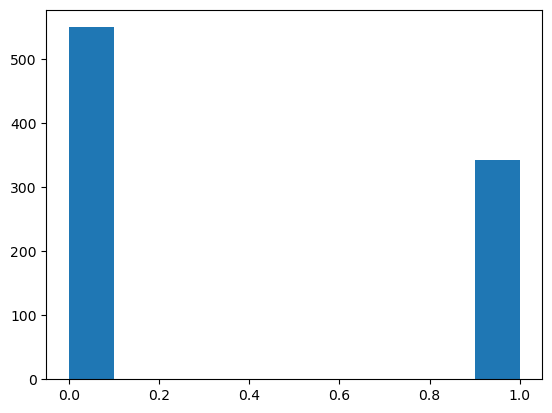

In [39]:
plt.hist(titanic.Survived) # nos muestra los tipos de Sobrevividos, 1--> vivos, 0 --> muertos. 

In [40]:
# nos muestra que murireon alrededor de 600 personas, y vivieron alrededor de 350 personas. 

(array([314.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 577.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

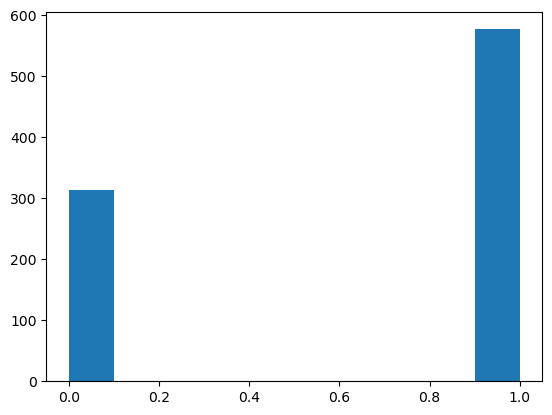

In [41]:
plt.hist(titanic.Sex) # nos muestra los tipos de sexo

In [42]:
# nos muestra que hay casi 600 hombres y alrededor de 300 mujeres. 

<Axes: xlabel='Sex', ylabel='Age'>

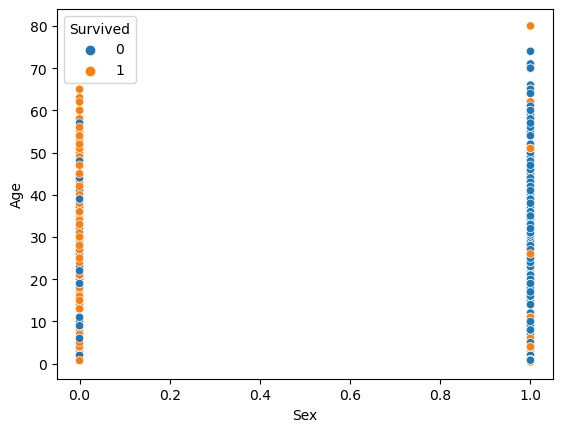

In [43]:
sns.scatterplot(x = "Sex", y = "Age", hue= "Survived", data = titanic)

In [44]:
# podemos apreciar que muchos hombres alrededor de 15 a 75 años murieron
# muchas mujeres de 15 a 65 años sobrevivieron. 

<Axes: xlabel='Pclass', ylabel='Age'>

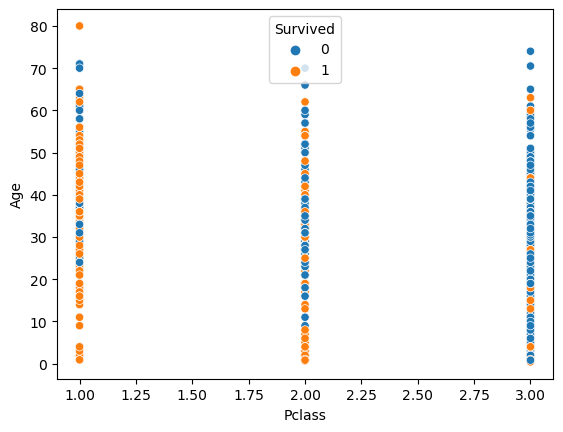

In [45]:
sns.scatterplot(x = "Pclass", y = "Age", hue= "Survived", data = titanic)

<Axes: xlabel='Pclass', ylabel='Sex'>

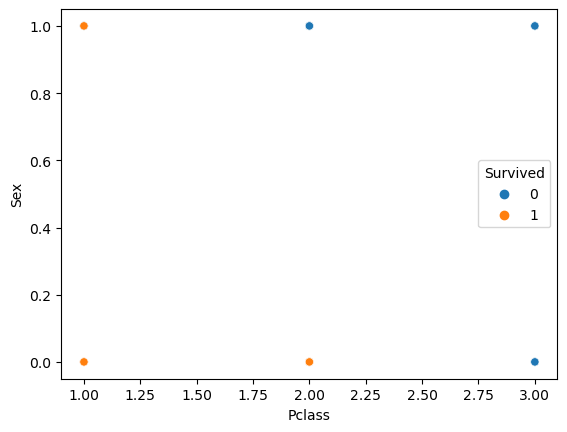

In [75]:
sns.scatterplot(x = "Pclass", y = "Sex", hue= "Survived", data = titanic)

In [ ]:
# tambien podemos apreciar muchos, tanto hombres como mujeres lograron vivir que tenian la clase 1. vemos que con la clase 2 vivieron mas la mujeres.
# Con la clase 3 vemos que tanto hombres commo mujeres no sobrevivieron. 

# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [46]:
predictors_col = ["Pclass", "Age","Sex", "SibSp","Parch","Fare"]
target_col = ['Survived']

In [47]:
predictors = titanic[predictors_col]
target = titanic[target_col]

In [48]:

predictors

,Pclass,Age,Sex,SibSp,Parch,Fare
0,3,22.0,1,1,0,7.2500
1,1,38.0,0,1,0,71.2833
2,3,26.0,0,0,0,7.9250
3,1,35.0,0,1,0,53.1000
4,3,35.0,1,0,0,8.0500
...,...,...,...,...,...,...
886,2,27.0,1,0,0,13.0000
887,1,19.0,0,0,0,30.0000
888,3,19.0,0,1,2,23.4500
889,1,26.0,1,0,0,30.0000


In [49]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [50]:
corr = predictors.corr()  # halla la correlacion entre las variabls predictoras
corr
# cercanoa a 1, alta correlacion directa
#cercanos a -1 , alta correlacion inversa
# cercano a 0, baja o nula correlacion

,Pclass,Age,Sex,SibSp,Parch,Fare
Pclass,1.000000,-0.291157,0.131900,0.083081,0.018443,-0.549500
Age,-0.291157,1.000000,0.058415,-0.206104,-0.165191,0.083417
Sex,0.131900,0.058415,1.000000,-0.114631,-0.245489,-0.182333
SibSp,0.083081,-0.206104,-0.114631,1.000000,0.414838,0.159651
Parch,0.018443,-0.165191,-0.245489,0.414838,1.000000,0.216225
Fare,-0.549500,0.083417,-0.182333,0.159651,0.216225,1.000000


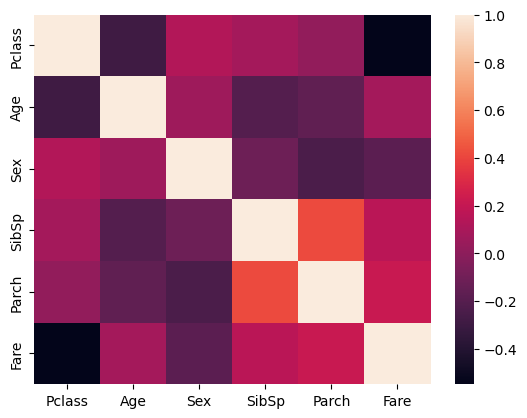

In [51]:
# mapa de calor
sns.heatmap(corr)
plt.show()

In [66]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.30, random_state= 12)

# 5. Entrenar el modelo configurando los diferentes hiperparametros

In [67]:

tree = DecisionTreeClassifier(max_depth=10)  # me crea el arbol

In [68]:
arbol = tree.fit(x_train, y_train)  # empiezo a entrenar el arbol

-- crear arbol de decision 

In [69]:
predicciones = arbol.predict(x_test)

In [70]:
predicciones

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1], dtype=int64)

# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [71]:
# Examina la matriz de confusion
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,0,1
Actual,,
0,137,24
1,37,70


In [72]:
accuracy = accuracy_score(y_test, predicciones)
print("Precision del modelo:", accuracy)

Precision del modelo: 0.7723880597014925


* si aumentamos los datos de test al 30 % nos da una precision de 0.77
* con 20 % de prueba nos da una precison de 0.71
* con un 25 % de prueba nos da 0.76 de precision

# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

[Text(0.41049592391304346, 0.9545454545454546, 'x[2] <= 0.5\ngini = 0.47\nsamples = 623\nvalue = [388, 235]'),
 Text(0.1565896739130435, 0.8636363636363636, 'x[0] <= 2.5\ngini = 0.37\nsamples = 216\nvalue = [53, 163]'),
 Text(0.059782608695652176, 0.7727272727272727, 'x[1] <= 2.5\ngini = 0.077\nsamples = 124\nvalue = [5, 119]'),
 Text(0.03260869565217391, 0.6818181818181818, 'x[4] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.021739130434782608, 0.5909090909090909, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.043478260869565216, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.08695652173913043, 0.6818181818181818, 'x[1] <= 56.5\ngini = 0.064\nsamples = 121\nvalue = [4, 117]'),
 Text(0.06521739130434782, 0.5909090909090909, 'x[1] <= 27.0\ngini = 0.05\nsamples = 118\nvalue = [3, 115]'),
 Text(0.05434782608695652, 0.5, 'x[1] <= 24.5\ngini = 0.113\nsamples = 50\nvalue = [3, 47]'),
 Text(0.03260869565217391, 0.4090909090909091, 'x[5] <= 13.396\n

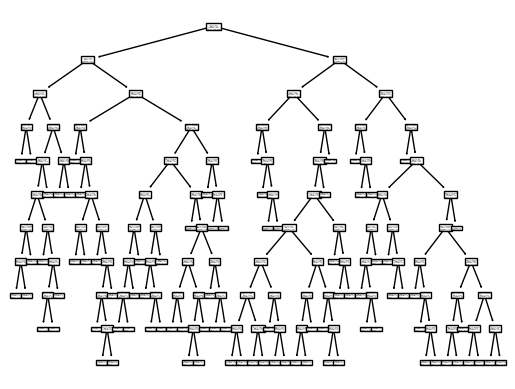

In [73]:
plot_tree(arbol)

# 8.Interpretar, analizar y documentar los resultados obtenidos.

# nos muestra que murireon alrededor de 600 personas, y vivieron alrededor de 350 personas. 
# nos muestra que hay casi 600 hombres y alrededor de 300 mujeres. 
# podemos apreciar que muchos hombres alrededor de 15 a 75 años murieron
# muchas mujeres de 15 a 65 años sobrevivieron. 

# tambien podemos apreciar muchos, tanto hombres como mujeres lograron vivir que tenian la clase 1. vemos que con la clase 2 vivieron mas la mujeres.
# Con la clase 3 vemos que tanto hombres commo mujeres no sobrevivieron. 